# Assignment 5: 311 Database

**Due:** 30 November before 10pm

These data were scraped from the 311 Service Request data available from the [New York City Open Data site](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). The data are presented to you in four arrays each with **N** rows representing service requests over a period of about 4 weeks of full days.
 
**Times:** N by 3 integer array of the _Day_ (counting from 0), _Hour_ (0 to 23), and _Day of the Week_ (Monday is 0) the request was created.
 
**Requests:** N by 2 string array of the _Complaint_ and the _Descriptor_ for the request.
 
**Locations:** N by 2 string array of the _City_ and _[Borough](https://en.wikipedia.org/wiki/Borough)_ for the request.
 
**Coordinates:** N by 2 float array of the _X_ and _Y_ coordinates of the request in the [State Plane Coordinate system](https://en.wikipedia.org/wiki/State_Plane_Coordinate_System). You won't need to know anything about the coordinate system, just that they are two orthogonal coordinates in the plane. 
 
Think of the 4 arrays as representing one large table with the **N** rows and 9 columns. 

In [1]:
Author = 'youronyen' # not your pid, your onyen
Collaborators = [ 'list', 'their', 'onyens' ]

## Set up

I will set up the environment for you here. Do not modify any of this.

In [2]:
%matplotlib inline
import numpy as np
import pylab
import comp116

check, report = comp116.start('A5')

# I'll load the data for you and make it unwriteable to protect you. 
# Don't change this!
with np.load('311.npz') as data:
    Times = data['Times']
    Times.flags.writeable = False
    Requests = data['Requests']
    Requests.flags.writeable = False
    Locations = data['Locations']
    Locations.flags.writeable = False
    Coordinates = data['Coordinates']
    Coordinates.flags.writeable = False

## 1. How many requests do we have?

I'm looking for **N** as in the description above.

In [3]:
#Write your code here
A1 = 0
#Solution
A1 = len(Times)
#End

print('Number of requests =', A1)

check('A1', A1, points=4)

Number of requests = 14204
A1 recorded


## 2. What was the average number of requests per hour?

In [4]:
#Write your code here
A2 = 0.0
#Solution
ndays = Times[-1,0] + 1
nhours = 24 * ndays
A2 = len(Times) / nhours
#End

print('Requests/hour =', A2)
check('A2', A2, points=4)

Requests/hour = 22.7628205128
A2 recorded


## 3. Which cities are in the data?

I want an alphabetized list of the different values in the city column of the locations. Each city name should be in the list only once.

In [5]:
#Write your code here
A3 = []
#Solution
A3 = sorted(np.unique(Locations[:,0]))
#End

print('Cities =', A3)
check('A3', A3, points=4)

Cities = ['Arverne', 'Astoria', 'Bayside', 'Bellerose', 'Bronx', 'Brooklyn', 'Cambria Heights', 'Central Park', 'College Point', 'Corona', 'East Elmhurst', 'Elmhurst', 'Far Rockaway', 'Floral Park', 'Flushing', 'Forest Hills', 'Fresh Meadows', 'Glen Oaks', 'Hollis', 'Howard Beach', 'Jackson Heights', 'Jamaica', 'Kew Gardens', 'Little Neck', 'Long Island City', 'Maspeth', 'Middle Village', 'New Hyde Park', 'New York', 'Oakland Gardens', 'Ozone Park', 'Queens', 'Queens Village', 'Rego Park', 'Richmond Hill', 'Ridgewood', 'Rockaway Park', 'Rosedale', 'Saint Albans', 'South Ozone Park', 'South Richmond Hill', 'Springfield Gardens', 'Staten Island', 'Sunnyside', 'Whitestone', 'Woodhaven', 'Woodside']
A3 recorded


## 4. Which complaints happened every day?

Your result should be an alphabetical list of complaints that occur every day in the data. In other words, if there is even a single day without a particular complaint, that complaint should not be in your list. Each complaint should only be in the list once.

In [6]:
#Write your code here
A4 = [] # expecting a list of strings
#Solution
ndays = Times[-1,0] + 1
reqs = [ set() for i in range(ndays) ]
for i in range(len(Times)):
    complaint, descriptor = Requests[i]
    d, h, w = Times[i]
    reqs[d].add(complaint)
A4 = sorted(set.intersection(*reqs))
#End

print('Complaints that happened every day', A4)
check('A4', A4, points=8)

Complaints that happened every day ['Blocked Driveway', 'Derelict Vehicle', 'Illegal Parking', 'Noise - Commercial', 'Noise - Street/Sidewalk', 'Noise - Vehicle', 'Traffic', 'Vending']
A4 recorded


## 5. Which time had the most requests?

Your result should be a two-element array of the day and hour of the time that had the most requests.

In [7]:
#Write your code here
A5 = np.array([0, 0])
#Solution
def RequestsPerHour(t):
    '''Return an array with the count of requests each hour'''
    result = np.bincount(t[:,0]*24 + t[:,1])
    return result

rph = RequestsPerHour(Times)
i = np.argmax(rph)
A5 = np.array([i//24, i%24])
#End

print('Most requests [Day Hour] =', A5)
check('A5', A5, points=8)

Most requests [Day Hour] = [13 23]
A5 recorded


## 6. Where are the parties?

Which city has the most requests with descriptor 'Loud Music/Party'?

In [8]:
Descriptor = 'Loud Music/Party'

#Write your code here
A6 = ''

#Solution
isDescriptor = Requests[:,1] == Descriptor
counts = {}
for city in Locations[isDescriptor, 0]:
    counts[city] = counts.get(city, 0) + 1
most = 0
for city, count in counts.items():
    if count > most:
        most = count
        A6 = city
#End

print('Party city =', A6)
check('A6', A6, points=8)

Party city = New York
A6 recorded


## 7. Where are they drinking in the Bronx?

Plot points at the coordinates of the requests with borough 'Bronx' and complaint 'Drinking'.

Do **not** augment the plot in any way. No titles, etc. 

A7 recorded


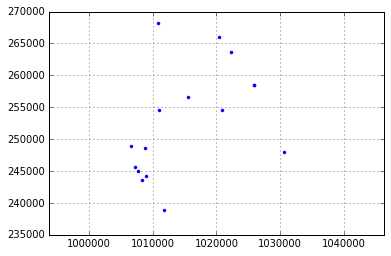

In [9]:
Borough = 'Bronx'
Complaint = 'Drinking'

#Write your code here
#Solution
isBorough = Locations[:,1] == Borough
isComplaint = Requests[:,0] == Complaint
C = Coordinates[isBorough & isComplaint]
pylab.plot(C[:,0], C[:,1], '.')
#End

#These lines format the graph to make it look nicer, no need to change them
pylab.axes().set_aspect('equal', 'datalim')
pylab.grid()

check('A7', pylab.gcf(), points=8)

## 8. Where is the most blocked driveway?

I want the coordinate that has the most requests with complaint 'Blocked Driveway'? I'm expecting a two-element float array with the X/Y coordinate of the driveway with the most complaints.

In [10]:
Complaint = 'Blocked Driveway'

# Write your code here
A8 = np.zeros(2)
#Solution
isBlocked = Requests[:,0] == Complaint
blocked = {}
for X, Y in Coordinates[isBlocked]:
    K = (X, Y)
    blocked[K] = blocked.get(K, 0) + 1
most = 0
for K,N in blocked.items():
    if N >= most:
        most = N
        A8 = np.array(K)
        print(most, A8)
#End

print('Most blocked coordinate =', A8)
check('A8', A8, points=8)

1 [ 1008560.   248235.]
1 [ 1029394.   264364.]
1 [ 1010170.   193217.]
1 [ 1004373.   170353.]
1 [ 1021003.   238345.]
1 [ 1012956.   171106.]
3 [ 986006.  169650.]
3 [ 1028693.   189853.]
6 [ 985475.  189421.]
7 [ 1026239.   224663.]
8 [ 993508.  189621.]
9 [ 1002442.   218986.]
Most blocked coordinate = [ 1002442.   218986.]
A8 recorded


## 9. How long can I sleep?

What is the length the longest run of hours with no requests having the string 'Noise' anywhere in the complaint?

In [11]:
Word = 'Noise' # anywhere in the Complaint

# Write your code here
A9 = 0
#Solution
isLoud = np.array([ Word in complaint for complaint, descriptor in Requests ])
lrph = RequestsPerHour(Times[isLoud])
run = 0
for l in lrph:
    if l == 0:
        run += 1
        if run > A9:
            A9 = run
    else:
        run = 0
#End

print('Longest run of quiet hours =', A9)
check('A9', A9, points=12)

Longest run of quiet hours = 6
A9 recorded


## 10. What was the average number of parties for each day of the week?

I want an array with 7 entries giving the average number of requests with descriptor 'Loud Music/Party' for each day of the week (Monday through Sunday). 

Note that the number of days **may not** be a multiple of 7 which means the divisor for each day of the week may be different. For example, there may be 4 Saturdays but only 3 Thursdays. You can't simply add up the number of requests for each day of the week. You'll need to compute the divisor for each day of the week because the dataset I use for grading may be different.

In [12]:
Descriptor = 'Loud Music/Party'

# Write your code here
A10 = np.zeros(7)
#Solution
isLoud = Requests[:,1] == Descriptor
dailyevents = np.bincount(Times[isLoud,2])
ndays = [ len(np.unique(Times[Times[:,2]==d, 0])) for d in range(7) ]
print(dailyevents)
print(ndays)
A10 = dailyevents / ndays
#End

print('Average parties each day of the week =', A10)
check('A10', A10, points=12)

[280 234 325 252 270 810 830]
[4, 4, 4, 3, 3, 4, 4]
Average parties each day of the week = [  70.     58.5    81.25   84.     90.    202.5   207.5 ]
A10 recorded


## 11. How far will an inspector have to travel?

How far will an inspector have to travel to visit, in the order they occurred, all of the coordinates with complaint 'Derelict Vehicle' and city 'Astoria'? That is, compute the sum of the distances between consecutive coordinates of these requests. Your answer will have the same units as the coordinates.

In [13]:
City = 'Astoria'
Complaint = 'Derelict Vehicle'

# Write your code here
A11 = 0.0
#Solution
isCity = Locations[:,0] == City
isComplaint = Requests[:,0] == Complaint
Cs = Coordinates[isCity & isComplaint]
#print(Cs)
deltaC = np.diff(Cs, axis=0)
#print(deltaC)
dists = np.sqrt(np.sum(deltaC ** 2, axis=1))
#print(dists)
A11 = np.sum(dists)
#End

print('Distance traveled =', A11)
check('A11', A11, points=12)


Distance traveled = 76673.2982453
A11 recorded


## 12. Which descriptors only occur after office hours?

The office opens at 8am and closes precisely at 5pm (17 in 24 hour time we are using), Monday through Friday. The office is closed at all other times.

Which request descriptors came in while the office was closed but never while it was open? I'm looking for a list of different descriptors in alphabetical order. Each descriptor should be in the list only once.

In [14]:
# Write your code here
A12 = []
#Solution
isOpen = (Times[:,1] >= 8) & (Times[:,1] < 17) & (Times[:,2] < 5)
isClosed = ~isOpen
closedRequests = set(Requests[isClosed, 1])
openRequests = set(Requests[isOpen, 1])
A12 = sorted(closedRequests - openRequests)
#End

print('After hours requests =', A12)
check('A12', A12, points=12)

After hours requests = ['After Hours - Licensed Est', 'Building', 'Nuisance/Truant']
A12 recorded


In [16]:
report(Author, Collaborators)

12 problems for 100 points
expected values dumped to A5.pickle
